In [1]:
import sys 
import os
# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import psycopg2
from dotenv import load_dotenv
from scripts.load_from_postgres import fetch_data_from_postgres
from scripts.User_overview_analysis import DataProcessor, OverviewAnalysis, UserBehaviour, Analysis, plots, PCA_analysis
from scipy.stats import zscore
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings(
    "ignore", category = FutureWarning

)

In [3]:
query = "SELECT * FROM"
table_name = 'xdr_data'
df = fetch_data_from_postgres(query, table_name)

Connection successful!


c:\Users\Ashis\Desktop\KAIM Program 2\week2\scripts\load_from_postgres.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(full_query, conn)


Data imported successfully!


In [4]:
data_process = DataProcessor(df)

In [5]:
data_process.check_missing_values()
data_process.handle_missing_values()

Showing missing values
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [6]:
overview_analysis = OverviewAnalysis(df)

In [7]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [8]:
analysis = Analysis(df)
user_aggregates = analysis.detect_handle_outliers()
top5_deciles = analysis.top5_deciles()
top5_deciles.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (DL+UL) (Bytes),Total Duration,Decile Class
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,104756.334139,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,76411.0,5
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,104756.334139,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,118487293.0,325995.0,7
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,104756.334139,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,834163359.0,145309.0,6
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,104756.334139,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,903975407.0,338960.0,7
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,104756.334139,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,872988322.0,3079920.0,9


In [9]:
metrics, dispersion = analysis.metrics_dispersion_analysis()

In [10]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
user_behaviour = UserBehaviour(df)
user_aggregates = user_behaviour.user_aggregates()

In [12]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [18]:
assert (user_aggregates['Total Data (DL+UL) (MB)'] >= user_aggregates['Total DL (MB)']).all()


In [ ]:
assert (user_aggregates['Total Data (DL+UL) (MB)'] >= user_aggregates['Total UL (MB)']).all()

In [14]:
print(user_aggregates.columns)

Index(['IMSI', 'Number of xDR Sessions', 'Total Session Duration (s)',
       'Total DL (MB)', 'Total UL (MB)', 'Social Media DL (MB)',
       'Social Media UL (MB)', 'Google DL (MB)', 'Google UL (MB)',
       'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)',
       'Netflix DL (MB)', 'Netflix UL (MB)', 'Gaming DL (MB)',
       'Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)',
       'Total Data Volume (MB)', 'Total Data (DL+UL) (MB)'],
      dtype='object')


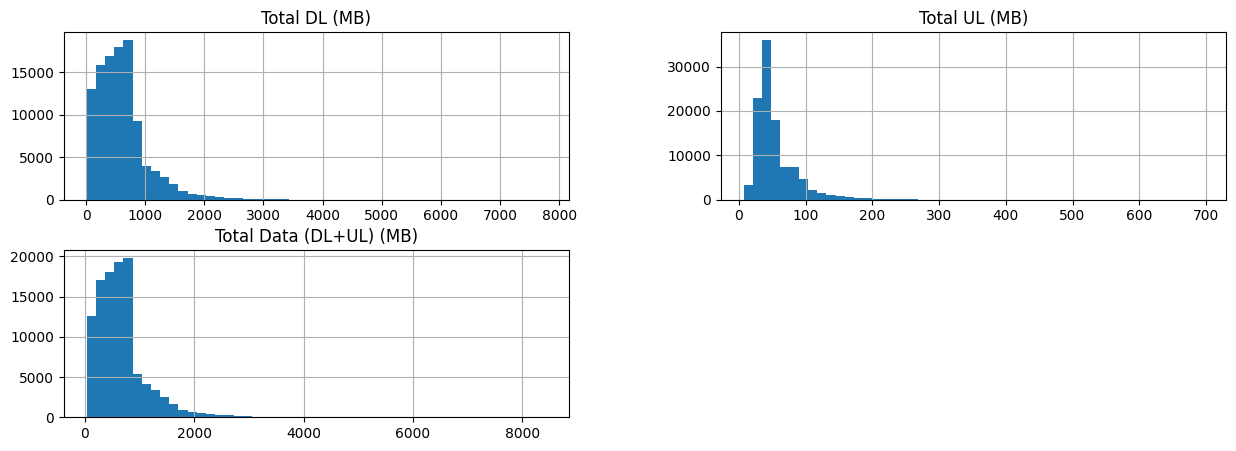

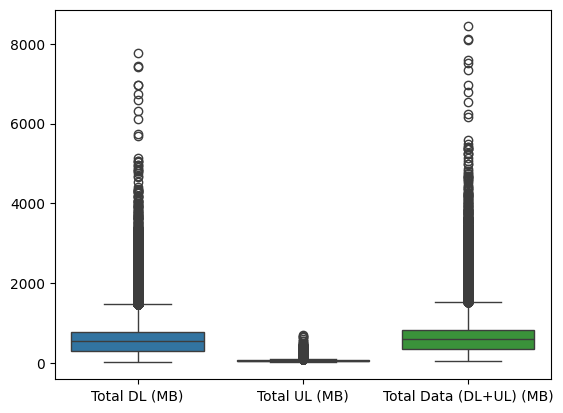

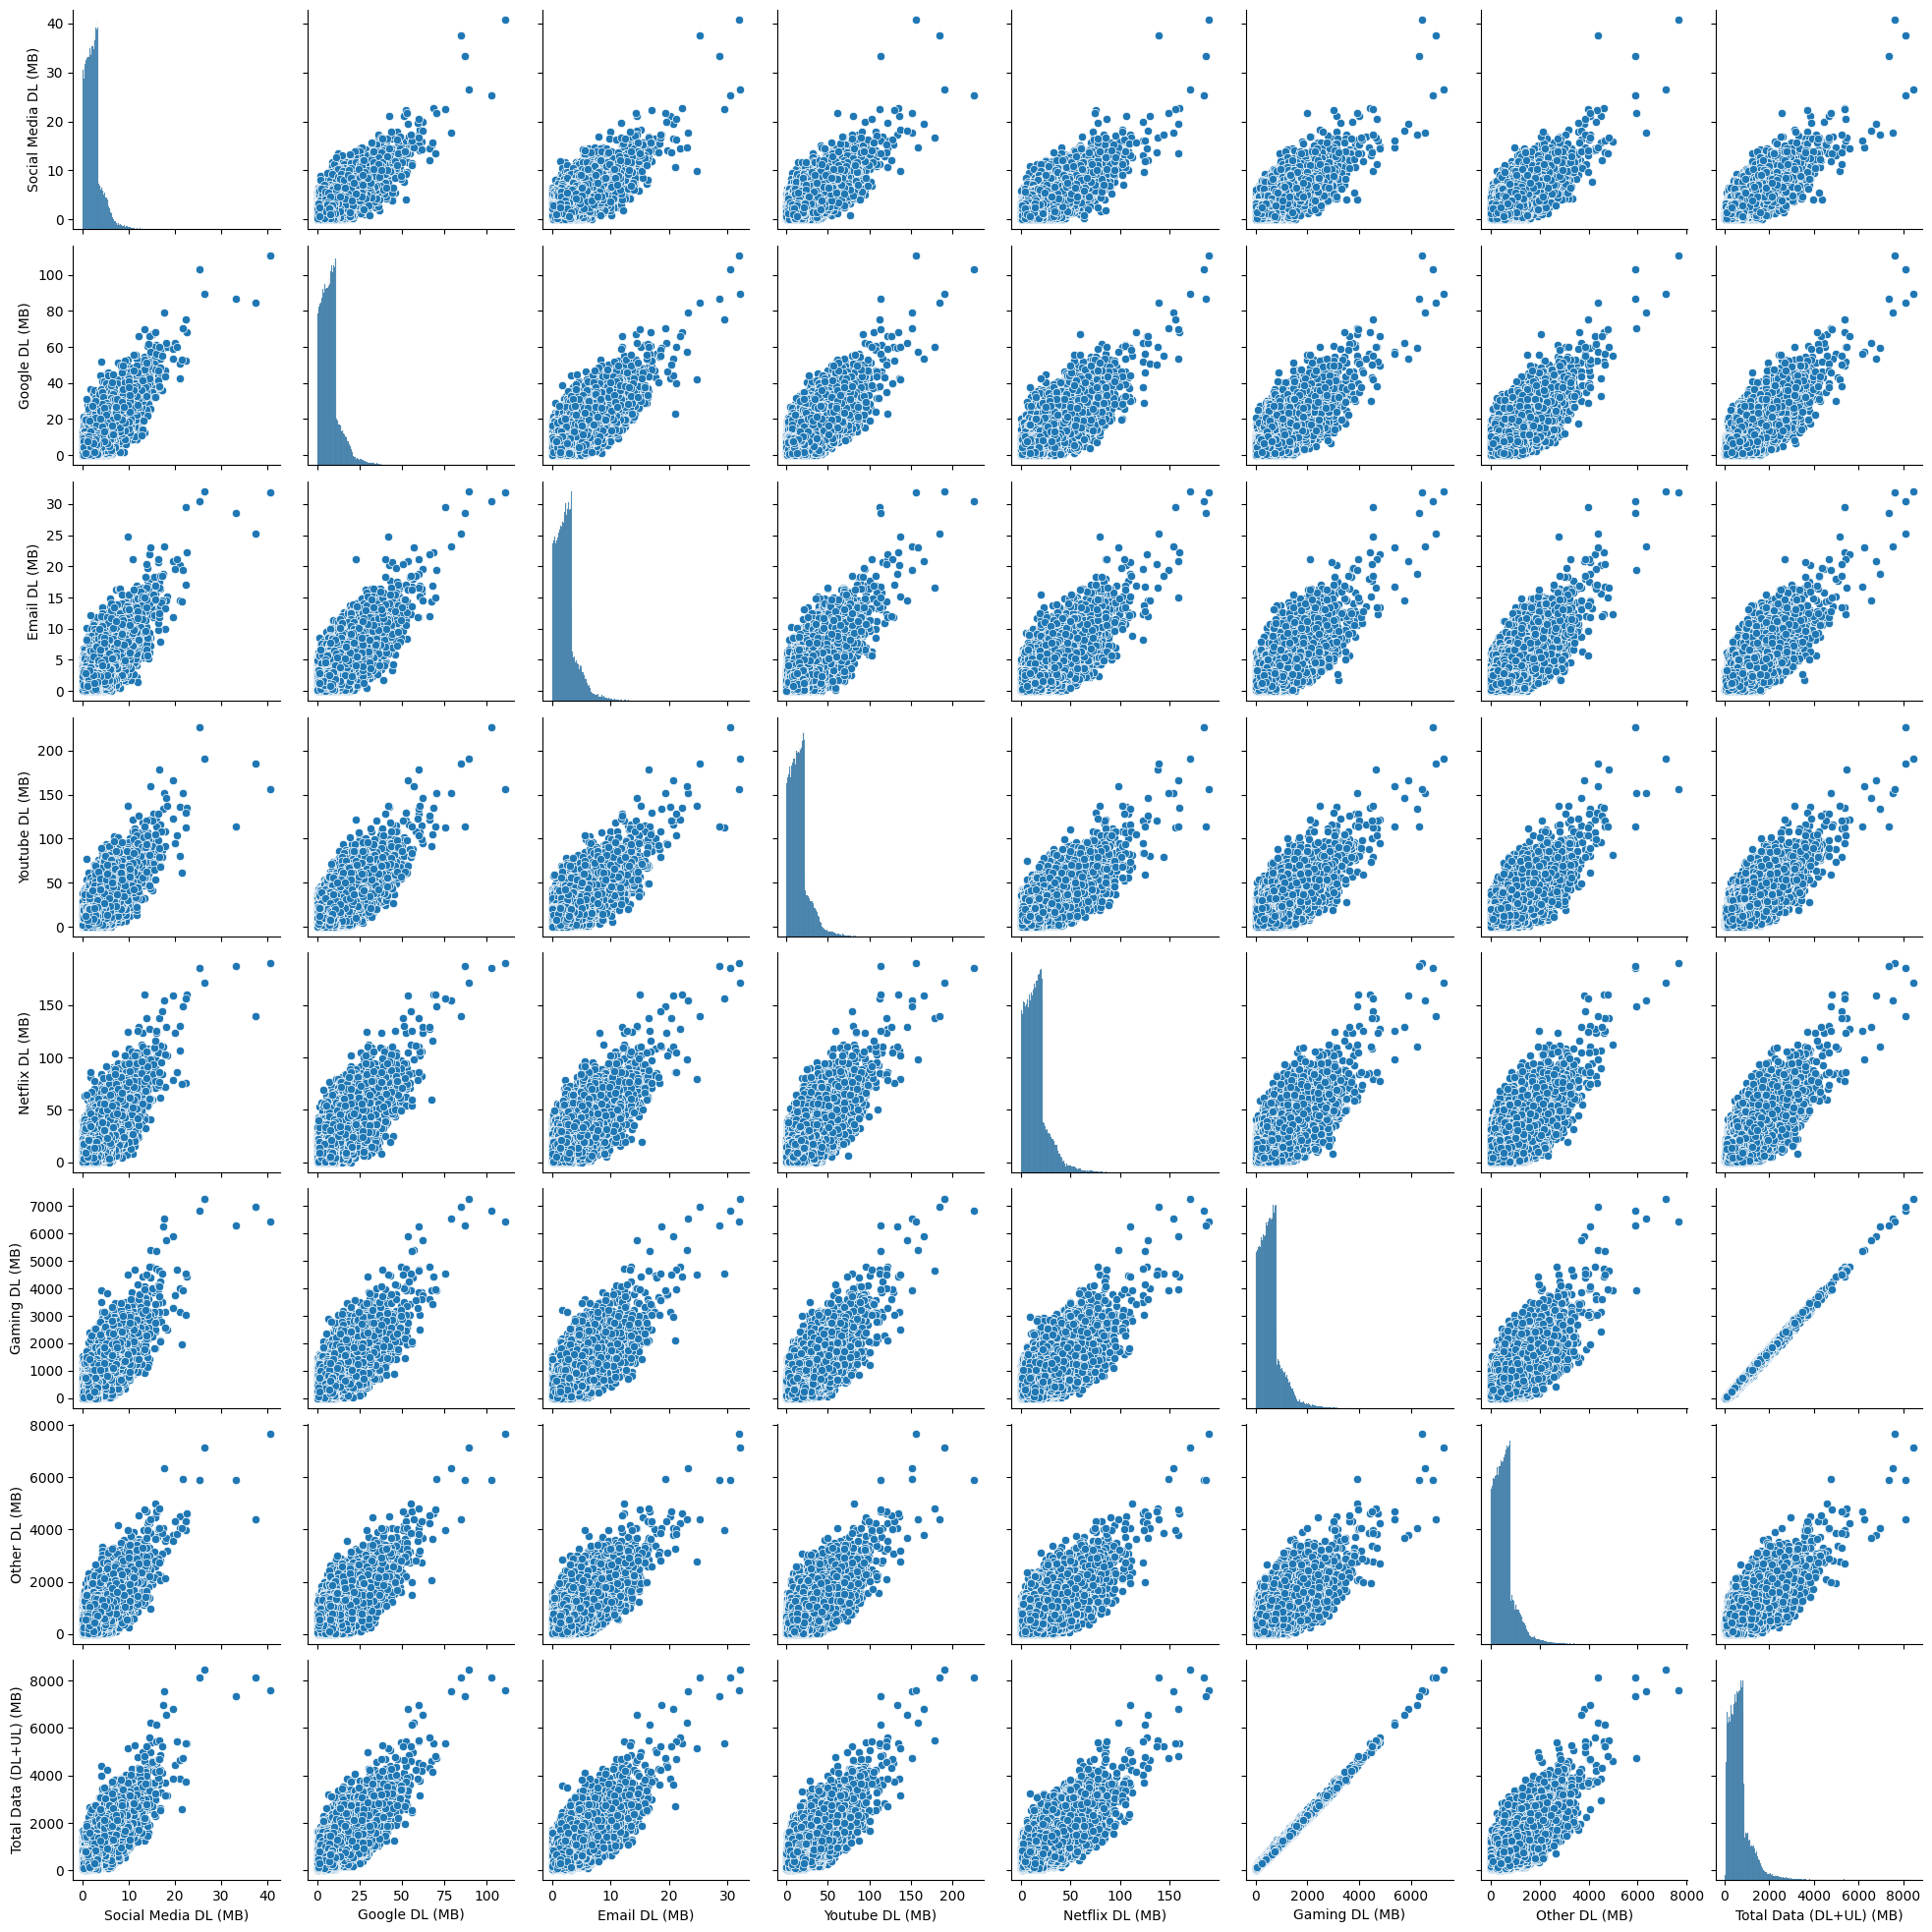

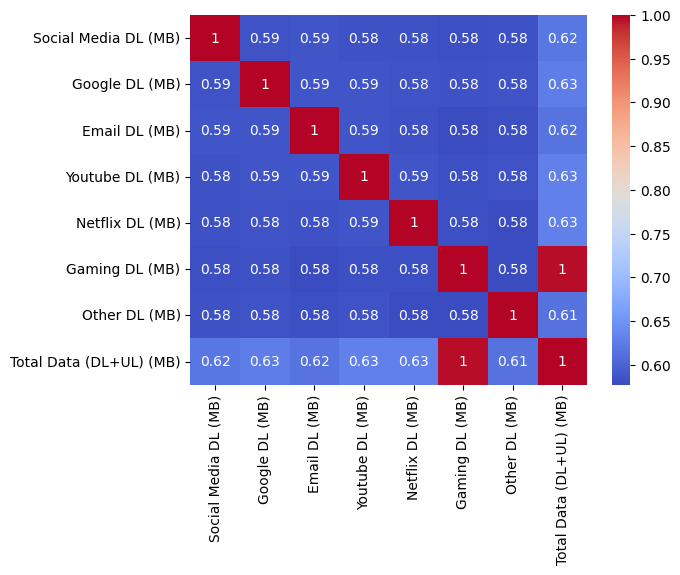

In [15]:
plots = plots(user_aggregates)
plots.univariate_plot()
plots.scatter_plot()
plots.correlation_matrix()

Explained variance ratio: [0.88756646 0.11243354]
PCA components: [[ 0.59438987  0.53421473  0.6010951 ]
 [-0.41918853  0.84370695 -0.33532009]]


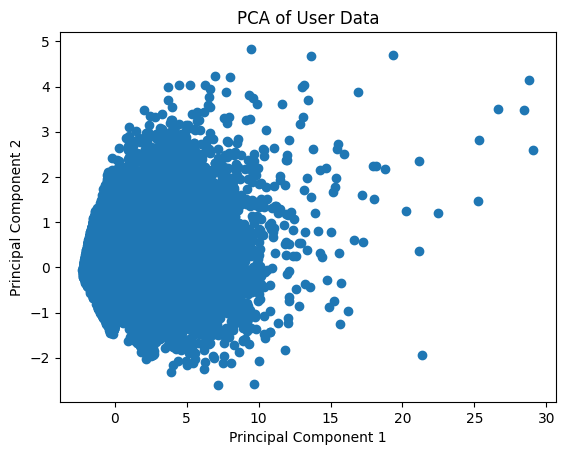

In [16]:
PCA_analysis = PCA_analysis(user_aggregates)
PCA_analysis.compute_PCA()